### Network Analysis: Two-Mode Networks

### Introduction

In this assignment we want to analyze two-node networks and determine relationships between nodes. 

The dataset represents observed attendance at 14 social events by 18 Southern women in the 1930s. The result is a person-by-event matrix: cell (i,j) is 1 if person i attended social event j, and 0 otherwise.

Assignment prompt: What can you infer about the relationships between (1) the women, and (2) the social events? 

### Load packages

In [37]:
import networkx as nx
import networkx.algorithms.bipartite as bipartite
import matplotlib.pyplot as plt
import numpy

from networkx.algorithms.components.connected import connected_components
from scipy.spatial import distance
from scipy.cluster import hierarchy
from collections import defaultdict

% matplotlib inline

### Load data and view summary statistics

In [38]:
G = nx.davis_southern_women_graph()
women, events = nx.bipartite.sets(G)
G_nodes = G.number_of_nodes()
G_edges = G.number_of_edges()
print ("Number of nodes:", G_nodes)
print ("Number of edges:", G_edges)

Number of nodes: 32
Number of edges: 89


### Graph 1: Unipartite Projection
E nodes indicate social events; named nodes indicate participants.

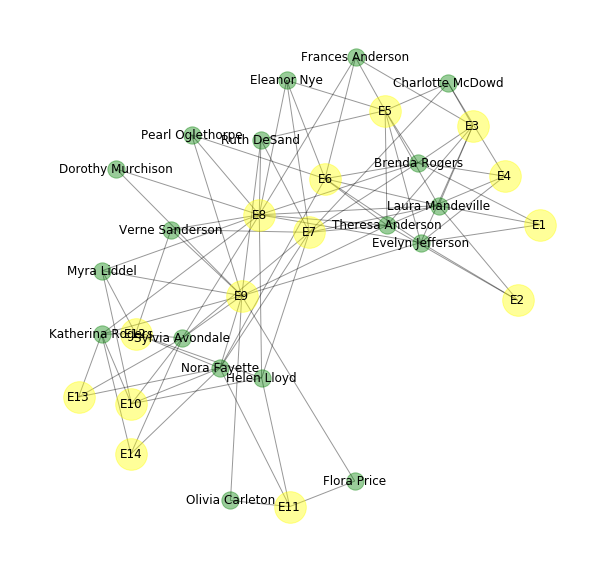

In [39]:
plt.figure(figsize = (10, 10))
plt.axis('off')
pos=nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, nodelist=women, node_color='green', alpha = 0.4)
nx.draw_networkx_nodes(G, pos, nodelist=events, node_color='yellow', alpha = 0.4, node_size = 1000)
nx.draw_networkx_edges(G, pos, alpha = 0.4)
nx.draw_networkx_labels(G, pos);

### Graph 2: Unipartite Projection
"E" nodes indicate social events; named nodes indicate participants.
Nodes with more connections are displayed larger.

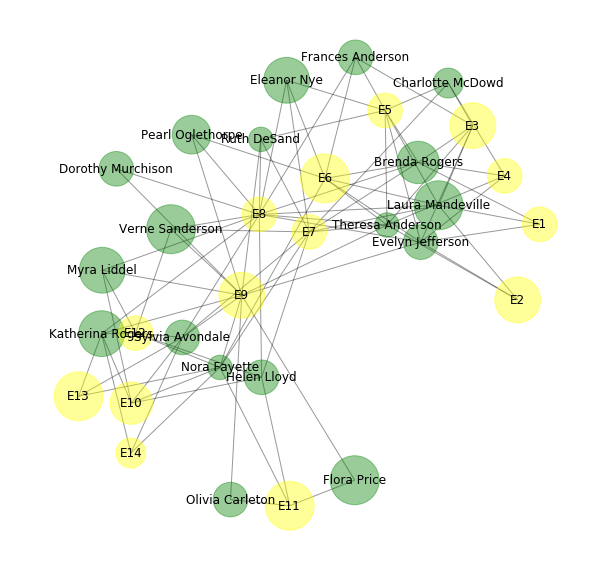

In [40]:
plt.figure(figsize = (10, 10))
plt.axis('off')
node_sizes=[G.degree(i)*300 for i in G.nodes()]
#nx.draw_networkx(G,pos, node_size=node_sizes,with_labels=True, alpha = 0.8, node_color="orange")

nx.draw_networkx_nodes(G, pos, nodelist=women, node_color='green', alpha = 0.4, node_size = node_sizes)
nx.draw_networkx_nodes(G, pos, nodelist=events, node_color='yellow', alpha = 0.4, node_size = node_sizes)
nx.draw_networkx_edges(G, pos, alpha = 0.4)
nx.draw_networkx_labels(G, pos);

### Graph 3: Bipartite Projection
View weights of associations between nodes.

In [41]:
BPWomen = bipartite.projected_graph(G, women)
print("Connections, Woman")
for i in women:
    print('%d %s' % (BPWomen.degree(i),i))

Connections, Woman
12 Flora Price
15 Eleanor Nye
15 Laura Mandeville
16 Katherina Rogers
17 Sylvia Avondale
16 Dorothy Murchison
12 Olivia Carleton
11 Charlotte McDowd
15 Frances Anderson
17 Helen Lloyd
17 Evelyn Jefferson
15 Brenda Rogers
16 Myra Liddel
17 Verne Sanderson
16 Pearl Oglethorpe
17 Nora Fayette
17 Theresa Anderson
17 Ruth DeSand


In [61]:
BPEvents = bipartite.projected_graph(G, events)
print("Event, Connections")
for i in events:
    print('%s %d' % (i, BPEvents.degree(i)))

Event, Connections
E11 8
E3 8
E13 8
E9 13
E4 8
E8 13
E12 8
E14 8
E5 8
E1 8
E7 13
E10 8
E2 8
E6 13


### Conclusion

We can see that events and attendees are closely connected. 